# t-SNE 範例
* 觀察S曲線使用 t-SNE 不同 perplexity 的流形還原效果

In [28]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
import time

In [28]:
# 設定模型與繪圖參數
n_samples = 300
n_components = 2
perplexities = np.arange(30, 300, 30)

# 設定S曲線資料點
X, color = datasets.samples_generator.make_s_curve(n_samples, random_state=0)

S - Curve with perplexity = 30 in 1.408 sec
S - Curve with perplexity = 60 in 1.401 sec
S - Curve with perplexity = 90 in 1.853 sec
S - Curve with perplexity = 120 in 1.863 sec
S - Curve with perplexity = 150 in 1.886 sec
S - Curve with perplexity = 180 in 1.818 sec
S - Curve with perplexity = 210 in 2.078 sec
S - Curve with perplexity = 240 in 1.723 sec
S - Curve with perplexity = 270 in 1.492 sec


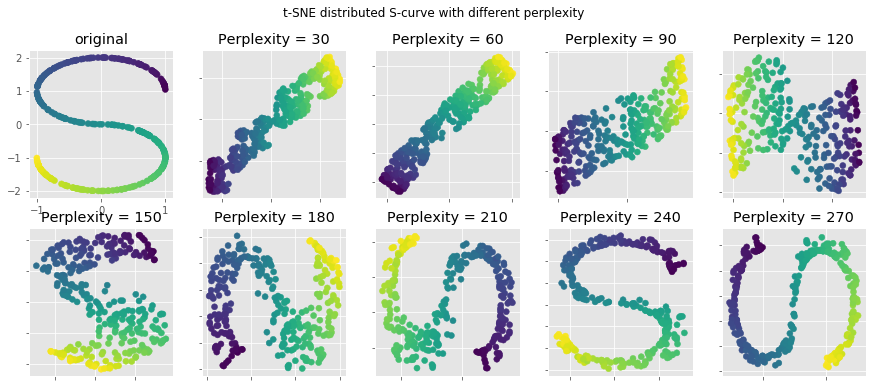

In [35]:
# 繪製資料原圖
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
### 先繪出 Original
ax0 = axes.ravel()[0]
ax0.scatter(X[:, 0], X[:, 2], c=color)
ax0.set_title('original')

# 繪製不同 perplexity 下的 t-SNE 分群圖 
axes = axes.ravel()[1:]
for ax, perp in zip(axes, perplexities):
    t0 = time.time()
    tsne = manifold.TSNE(n_components=n_components, init='pca',
                         random_state=0, perplexity=perp)
    X_tsne = tsne.fit_transform(X)
    t1 = time.time()
    
    print(f'S - Curve with perplexity = {perp} in {(t1-t0):.4g} sec')
    
    ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.set_title(f'Perplexity = {perp}')
    ax.axis('tight')
    
plt.suptitle('t-SNE distributed S-curve with different perplexity')
plt.show()